In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/kimhyunjo/opt/anaconda3/envs/nbkim/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Sequential 모델

In [5]:
model = tf.keras.Sequential(name = 'Sequential_API')
model.add(tf.keras.layers.Input(shape = (32, ), name = 'input'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu', name = 'dense1'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu', name = 'dense2'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'output'))

model.summary()

Model: "Sequential_API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 32)                1056      
_________________________________________________________________
dense2 (Dense)               (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


## Functional 모델

In [7]:
inputs = tf.keras.Input(shape = (32, ), name = 'input')
hidden1 = tf.keras.layers.Dense(units = 32, activation = 'relu', name = 'dense1')(inputs)
hidden2 = tf.keras.layers.Dense(units = 16, activation = 'relu', name = 'dense2')(hidden1)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'outputs')(hidden2)

model_functional = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Funtional_API')

model_functional.summary()

Model: "Funtional_API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32)]              0         
_________________________________________________________________
dense1 (Dense)               (None, 32)                1056      
_________________________________________________________________
dense2 (Dense)               (None, 16)                528       
_________________________________________________________________
outputs (Dense)              (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


## Subclassing 모델

In [10]:
class Mymodel(tf.keras.Model) :
    def __init__(self, hidden1, hidden2, outputs) :
        super(Mymodel, self).__init__(name = 'Subclassing')
        self.dense1 = tf.keras.layers.Dense(units = hidden1, activation = 'relu', name = 'dense1')
        self.dense2 = tf.keras.layers.Dense(units = hidden2, activation = 'relu', name = 'dense2')
        self.outputs = tf.keras.layers.Dense(units = outputs, activation = 'sigmoid', name = 'output_sigmoid')
        
    def call(self, inputs) :
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.outputs(x)
        
        return x

### 모델 호출

In [11]:
mymodel_sub = Mymodel(32, 16, 1)

In [13]:
mymodel_sub.build(input_shape = (100, 32, ))
mymodel_sub.summary()

Model: "Subclassing"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               multiple                  1056      
_________________________________________________________________
dense2 (Dense)               multiple                  528       
_________________________________________________________________
output_sigmoid (Dense)       multiple                  17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


### 데이터 호출

In [15]:
data = np.loadtxt('./data_set/pima-indians-diabetes.csv', delimiter = ',')
data.shape

(768, 9)

In [17]:
X = data[:, 0 : -1]
Y = data[ : , -1]
print(Y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [18]:
model = Mymodel(12, 8, 1)

In [19]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = './model_save/best_model.hdf5',
                                               moitor = 'val_loss',
                                               verbose = 1,
                                               save_best_only = True,
                                               save_weights_only = True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [24]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

history = model.fit(X, Y, epochs = 100, batch_size = 70, validation_split = 0.2, callbacks = [checkpoint, early_stop])

Epoch 1/100
9/9 [==============================] - 1s 16ms/step - loss: 5.5491 - acc: 0.6515 - val_loss: 4.6832 - val_acc: 0.6234

Epoch 00001: val_loss improved from inf to 4.68319, saving model to ./model_save/best_model.hdf5
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 3.5351 - acc: 0.6124 - val_loss: 3.3376 - val_acc: 0.5455

Epoch 00002: val_loss improved from 4.68319 to 3.33758, saving model to ./model_save/best_model.hdf5
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 2.6909 - acc: 0.5945 - val_loss: 2.6232 - val_acc: 0.5649

Epoch 00003: val_loss improved from 3.33758 to 2.62320, saving model to ./model_save/best_model.hdf5
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 2.1765 - acc: 0.5733 - val_loss: 2.0874 - val_acc: 0.5714

Epoch 00004: val_loss improved from 2.62320 to 2.08739, saving model to ./model_save/best_model.hdf5
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 1.9165 -


Epoch 00038: val_loss improved from 0.71433 to 0.70229, saving model to ./model_save/best_model.hdf5
Epoch 39/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6836 - acc: 0.6661 - val_loss: 0.7097 - val_acc: 0.6364

Epoch 00039: val_loss did not improve from 0.70229
Epoch 40/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6852 - acc: 0.6564 - val_loss: 0.6936 - val_acc: 0.6429

Epoch 00040: val_loss improved from 0.70229 to 0.69360, saving model to ./model_save/best_model.hdf5
Epoch 41/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6750 - acc: 0.6645 - val_loss: 0.7090 - val_acc: 0.6494

Epoch 00041: val_loss did not improve from 0.69360
Epoch 42/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6663 - acc: 0.6678 - val_loss: 0.7117 - val_acc: 0.5844

Epoch 00042: val_loss did not improve from 0.69360
Epoch 43/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6833 - acc: 0.6645 - val_loss: 0.6888 - val_ac

9/9 [==============================] - 0s 2ms/step - loss: 0.5841 - acc: 0.7068 - val_loss: 0.6392 - val_acc: 0.6558

Epoch 00080: val_loss did not improve from 0.63359
Epoch 81/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5808 - acc: 0.7199 - val_loss: 0.6358 - val_acc: 0.6948

Epoch 00081: val_loss did not improve from 0.63359
Epoch 82/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5809 - acc: 0.7134 - val_loss: 0.6343 - val_acc: 0.6883

Epoch 00082: val_loss did not improve from 0.63359
Epoch 83/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5824 - acc: 0.7231 - val_loss: 0.6485 - val_acc: 0.6364

Epoch 00083: val_loss did not improve from 0.63359


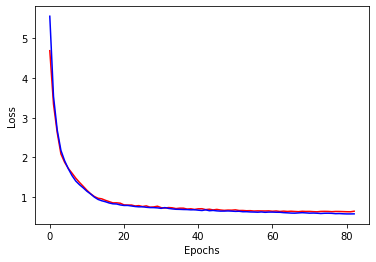

In [25]:
plt.plot(history.history['val_loss'], 'r', label = 'val_loss')
plt.plot(history.history['loss'], 'b', label = 'train_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# 자연어 예제

In [26]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진자 짜증나',
          '환상적인데, 정말 좋은거 같아']

targets = [[1], [0], [1], [1], [0], [1]] # 1 = positive

### tokenizer 는 단어의 총 갯수만큼 번호를 부여 한다!

In [27]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)

print(tokenizer.word_index)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진자': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


### 문장의 길이가 4로 동일한 경우
현업에서는 이런경우는 없다

In [31]:
sequences = tokenizer.texts_to_sequences(samples)
input_sequence = np.array(sequences)
targets = np.array(targets)

print(samples)
input_sequence

['너 오늘 이뻐 보인다', '나는 오늘 기분이 더러워', '끝내주는데, 좋은 일이 있나봐', '나 좋은 일이 생겼어', '아 오늘 진자 짜증나', '환상적인데, 정말 좋은거 같아']


array([[ 4,  1,  5,  6],
       [ 7,  1,  8,  9],
       [10,  2,  3, 11],
       [12,  2,  3, 13],
       [14,  1, 15, 16],
       [17, 18, 19, 20]])

In [34]:
batch_size = 2
num_epochs = 100
vocab_size = len(tokenizer.word_index) + 1
emb_size = 128
hidden_dimension = 256
output_dimension = 1

### Embedding hidden 노드의 구조
128 * 21 의 구조

In [35]:
model = tf.keras.Sequential(name = 'Sequential')

# 첫 시작 input 노드의 갯수가 21개, 다음 hidden 노드의 갯수는 128개
model.add(tf.keras.layers.Embedding(vocab_size, emb_size, input_length = 4)) # input 부분

# 들어온 x에 대해서 한 행의 평균을 구해라
model.add(tf.keras.layers.Lambda(lambda x : tf.reduce_mean(x, axis = 1)))

# hidden 노드의 시작!
model.add(tf.keras.layers.Dense(units = hidden_dimension, activation = 'relu', name = 'Dense1'))
model.add(tf.keras.layers.Dense(units = output_dimension, activation = 'sigmoid', name = 'Outputs'))

model.summary()

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 128)            2688      
_________________________________________________________________
lambda (Lambda)              (None, 128)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 256)               33024     
_________________________________________________________________
Outputs (Dense)              (None, 1)                 257       
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.fit(input_sequence, targets, epochs = 100, batch_size = 2)

Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6976 - acc: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6792 - acc: 0.8333
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6644 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6504 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6340 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6148 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5925 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5674 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5366 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5011 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4617 

3/3 [==============================] - 0s 1ms/step - loss: 7.2656e-04 - acc: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 1ms/step - loss: 7.0931e-04 - acc: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 6.9441e-04 - acc: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 1ms/step - loss: 6.7663e-04 - acc: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 6.6083e-04 - acc: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 1ms/step - loss: 6.4495e-04 - acc: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 1ms/step - loss: 6.3122e-04 - acc: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 1ms/step - loss: 6.1605e-04 - acc: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 1ms/step - loss: 6.0077e-04 - acc: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 1ms/step - loss: 5.8879e-04 - acc: 1.0000
Epoch 98/100
3/3 [=========================

## Functional API 이용

In [39]:
inputs = tf.keras.Input(shape = (4, ))
embedding = tf.keras.layers.Embedding(vocab_size, emb_size, name = 'embedding')(inputs)
lamda = tf.reduce_mean(embedding, axis = 1, name = 'lambda')
hidden = tf.keras.layers.Dense(units = hidden_dimension, activation = 'relu', name = 'dense')(lamda)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'outputs')(hidden)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Functional API')

model.summary()

Model: "Functional API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding (Embedding)        (None, 4, 128)            2688      
_________________________________________________________________
tf.math.reduce_mean_1 (TFOpL (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
outputs (Dense)              (None, 1)                 257       
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [40]:
class CustomModel(tf.keras.Model) :
    def __init__(self, vocab_size, emb_size, hidden_dimension, output_dimension) :
        super(CustomModel, self).__init__(name = 'Subclassing')
        self.embedding = tf.keras.layers.Embedding(vocab_size, emb_size, name = 'embedding')
        self.dense = tf.keras.layers.Dense(units = hidden_dimension, activation = 'relu', name = 'dense')
        self.outputs = tf.keras.layers.Dense(units = output_dimension, activation = 'sigmoid', name = 'outputs')
        
    def call(self, inputs) :
        x = self.embedding(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.dense(x)
        x = self.outputs(x)
        
        return x

In [41]:
mymodel = CustomModel(vocab_size, emb_size, hidden_dimension, output_dimension)

In [44]:
mymodel.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['acc'])

mymodel.fit(input_sequence, targets, epochs = 100, batch_size = 2)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6962 - acc: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6758 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6606 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6435 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6251 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6069 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5837 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5581 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5281 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4920 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4533 

3/3 [==============================] - 0s 1ms/step - loss: 7.2029e-04 - acc: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 1ms/step - loss: 7.0477e-04 - acc: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 6.8871e-04 - acc: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 1ms/step - loss: 6.7430e-04 - acc: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 6.5856e-04 - acc: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 1ms/step - loss: 6.4449e-04 - acc: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 1ms/step - loss: 6.2836e-04 - acc: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 1ms/step - loss: 6.1692e-04 - acc: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 1ms/step - loss: 6.0340e-04 - acc: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 1ms/step - loss: 5.9193e-04 - acc: 1.0000
Epoch 98/100
3/3 [=========================

## Machine learning

In [45]:
!pip install scikit-learn

     |████████████████████████████████| 7.2 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 66.2 MB/s eta 0:00:01
     |████████████████████████████████| 309 kB 88.8 MB/s eta 0:00:01


In [46]:
import sklearn

sklearn.__version__

'0.24.2'

## iris 데이터 호출

In [47]:
from sklearn.datasets import load_iris
import pandas as pd

In [53]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [54]:
print(iris_dataset['target'])
print(iris_dataset['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [55]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [64]:
iris = pd.DataFrame(iris_dataset['data'])
iris.columns = iris_dataset['feature_names']
iris['target'] = iris_dataset['target']

type(iris)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
setosa = iris[iris['target'] == 0]
versicolor = iris[iris['target'] == 1]
virgina = iris[iris['target'] == 2]

virgina.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


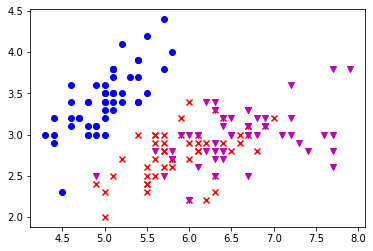

In [68]:
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker = 'o', color = 'b', label = 'setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], marker = 'x', color = 'r', label = 'versicolor')
plt.scatter(virgina['sepal length (cm)'], virgina['sepal width (cm)'], marker = 'v', color = 'm', label = 'virgina')

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### train, test data 분할

In [70]:
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state = 42)

In [71]:
train_input.shape

(112, 4)

In [72]:
test_input.shape

(38, 4)

## StandardScaler 진행

In [74]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_scaled, train_label)

KNeighborsClassifier(n_neighbors=10)

### 신규 데이터 또한 StandardScaler 진행해야 한다

In [78]:
new_input = np.array([[6.1, 2.8, 4.7, 2.2]])

new_scaled = ss.transform(new_input)
new_scaled

array([[ 0.33066442, -0.55192639,  0.51683569,  1.32380572]])

In [81]:
predict_label = knn.predict(new_scaled)
predict_label

# 주위에 있는 10개의 데이터 모두 2로 선택 되어 있다.
knn.predict_proba(new_scaled)

# test 용 데이터로 진행 했을 때는 값이 다르게 나오는것을 확인 할수 있다.
knn.predict_proba(test_scaled[:5])

array([[0. , 0.9, 0.1],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.7, 0.3],
       [0. , 0.8, 0.2]])

In [82]:
predict_test = knn.predict(test_scaled)

print(predict_test)

print(np.mean(predict_test == test_label))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
1.0


# 비지도학습 k-means

In [95]:
from sklearn.cluster import KMeans

### n_clusters 의 갯수는 하이퍼 파라미터다

In [96]:
k_means = KMeans(n_clusters = 3)

In [97]:
ss = StandardScaler()
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state = 42)
ss.fit(train_input)
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [98]:
k_means.fit(train_scaled)

KMeans(n_clusters=3)

In [99]:
print(train_scaled)

[[-1.01827123  1.2864604  -1.39338902 -1.3621769 ]
 [-0.7730102   2.43545215 -1.33550342 -1.49647603]
 [-0.03722712 -0.78172474  0.74837808  0.92090833]
 [ 0.20803391  0.8268637   0.4010645   0.51801093]
 [ 1.06644751  0.13746866  0.51683569  0.3837118 ]
 [-0.52774918  1.97585545 -1.45127462 -1.09357864]
 [-0.52774918  1.51625875 -1.33550342 -1.3621769 ]
 [-0.40511866 -1.47111979 -0.06202028 -0.28778385]
 [ 0.57592545 -0.55192639  0.74837808  0.3837118 ]
 [ 0.69855596  0.13746866  0.97992047  0.7866092 ]
 [ 0.94381699 -0.09232969  0.3431789   0.24941267]
 [ 1.67960008  1.2864604   1.32723405  1.72670311]
 [-0.15985763 -0.32212804  0.2274077   0.11511354]
 [ 2.17012213 -0.09232969  1.61666204  1.18950659]
 [-0.28248815 -0.09232969  0.4010645   0.3837118 ]
 [-0.89564072  1.05666205 -1.39338902 -1.3621769 ]
 [ 2.29275265 -0.55192639  1.67454764  1.05520746]
 [-0.03722712 -0.78172474  0.16952211 -0.28778385]
 [-0.7730102   0.8268637  -1.39338902 -1.3621769 ]
 [-1.01827123  1.05666205 -1.45

In [100]:
k_means.labels_

array([0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 2], dtype=int32)

In [101]:
predict_cluster = k_means.predict(test_scaled)
predict_cluster

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0], dtype=int32)

#### 맞으면 True 틀리면 False 로 나온다

In [102]:
np.mean(predict_cluster == test_label)

0.8421052631578947